<a href="https://colab.research.google.com/github/AleCongi/Esame-ICON-/blob/main/7Febbraio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ICON

In [4]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split
!pip install nltk
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.cluster import AffinityPropagation
from nltk import download as dl
from numpy.ma.core import outer
from sys import exit as exit
from nltk import word_tokenize as tkn
from re import sub as sub
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.cluster import KMeans
dl('wordnet')
dl('omw-1.4')
dl('punkt')
dl('stopwords')
from google.colab import drive
drive.mount('/content/drive', force_remount=False)

tot=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/eventsFixed.csv')

tot.head(10)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,id,fun,food,culture,isOpen,isMusic,text
0,1000187186721956,1,0,1,-1,0,Martedi 05 gennaio super tombolata al Barfly!\...
1,1007051849450711,0,0,0,-1,0,NaN
2,100731190460200,0,0,1,-1,1,"Ingresso free senza obbligo di consumazione,se..."
3,1014507045355357,0,0,0,-1,1,"Giovedi 8 Marzo, Napulitanata ""celebra la donn..."
4,1015563648832823,0,0,1,-1,1,yn e lieta di presentare\n\nNapoolyn x Resilie...
5,1021806692027608,0,0,0,-1,1,Serata live \nVENERDI' 18 MARZO \nUn piacevole...
6,1023358881203820,1,0,0,-1,0,Quest'anno in occasione di san Valentino il ri...
7,1026307021482635,1,0,1,-1,0,Menu adulti 30.00\nMenu bambini 15.00
8,1026761354178792,1,0,1,-1,0,Menu adulti 30.00\nMenu bambini 15.00
9,103006560538403,0,1,1,-1,1,La 1 Esposizione dei disegni di DIPSTER accomp...


In [5]:
tot.count()

id         7688
fun        7688
food       7688
culture    7688
isOpen     7688
isMusic    7688
text       7170
dtype: int64

È chiaro che ci siano dei testi nulli. È possibile che siano eventi senza descrizione. Me ne accerto:

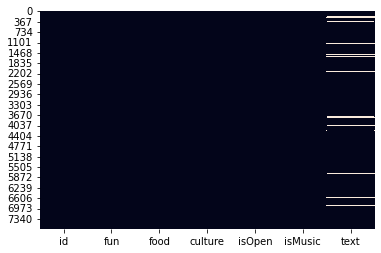

In [ ]:
sb.heatmap(tot.isna(), cbar=False)

##Quickfix

In [6]:
stp = open("/content/drive/MyDrive/Colab Notebooks/stopwordsita.txt", "r")
data = stp.read().split("\n")
stp.close()
stopwordsTotali = stopwords.words('italian') + stopwords.words('english') + data
stopwordsTotali = list(set(stopwordsTotali))

Sapendo che "id" è la nostra colonna primaria, controllo che il numero di valori unici nella colonna primaria sia uguale al numero di righe. Questo mi permette di accertarmi di non avere la stessa riga per più di una volta nel mio dataset.

In [7]:
tot['id'].nunique() == len(tot['id'])

False

In [8]:
tot = tot.drop_duplicates(subset="id", keep='last')
tot = tot.drop_duplicates(subset="text", keep='last')
for index, row in tot.iterrows():  
  try:
    trashId = row['id']
    trash = row['text'].lower()
  except AttributeError as ae:
    tot.drop(tot[tot['id'] == trashId].index, inplace=True)


In [9]:
descrizioni_filtrate = []
for index, descrizione in tot.iterrows():
  parole = tkn(str(descrizione['text']).lower())
  parole_filtrate = [parola for parola in parole if not parola in stopwordsTotali]
  descrizione_filtrata = " ".join(parole_filtrate)
  descrizioni_filtrate.append(descrizione_filtrata)

In [10]:
tot['text'][200]

"GIOVEDi 26 MAGGIO 2016 // 'NAPERITIVO IN OFFICINA...\nUna serata speciale al borgo marinaro con mini fish burger, prosecco e dj set live. Ti aspettiamo!\nINFO t. 081 19353543"

In [11]:
descrizioni_filtrate[200]

"napoel progetto discografico napoletano creato giri / gi napoletano louiel / secondlou ... seconda release , duo rilascia ep quattro tracce fonde piu pura techno detroit moderne sonorita industrial raw .. compresso perfetto due personalita artisti . venerdi , ore 21:00 , presenteremo esclusiva npl02 napoel - unit ep ascolta : https : //bit.ly/2uinye8 __________ l'occasione duo esibira dj set sara possibile acquistare l'ultima release prima , prezzi speciali . aspettiamo dischi , drink birre"

In [12]:
tot['id'].nunique() == len(tot['id'])

True

In [13]:
tot.count()

id         6327
fun        6327
food       6327
culture    6327
isOpen     6327
isMusic    6327
text       6327
dtype: int64

In [14]:
tot.drop('isOpen',inplace=True,axis=1)
tot.drop('id',inplace=True,axis=1)
tot

,fun,food,culture,isMusic,text
0,1,0,1,0,Martedi 05 gennaio super tombolata al Barfly!\...
2,0,0,1,1,"Ingresso free senza obbligo di consumazione,se..."
3,0,0,0,1,"Giovedi 8 Marzo, Napulitanata ""celebra la donn..."
4,0,0,1,1,yn e lieta di presentare\n\nNapoolyn x Resilie...
5,0,0,0,1,Serata live \nVENERDI' 18 MARZO \nUn piacevole...
...,...,...,...,...,...
7683,0,0,0,1,Hot Club Roma Trio\n\nMoreno Viglione chitarra...
7684,0,1,0,0,"Presentazione del libro:\n ""Tasmania"" (Einaudi..."
7685,0,1,1,1,In occasione delle GIORNATE EUROPEE DEL PATRIM...
7686,0,0,1,0,Vieni a Danzare gratuitamente per un giorno co...


In [15]:
'''from imblearn.under_sampling import RandomUnderSampler
colonna_bilanciamento = tot["fun"]
classe_da_bilanciare = tot[colonna_bilanciamento == 0]

# Crea un'istanza di RandomUnderSampler
rus = RandomUnderSampler()

# Esegui il re-sampling della colonna
X_resampled, y_resampled = rus.fit_resample(classe_da_bilanciare.values.reshape(-1, 1), classe_da_bilanciare)

# Sostituisci i valori bilanciati nella colonna originale
tot.loc[tot[colonna_bilanciamento == 0].index, "fun"] = X_resampled.ravel()'''

'from imblearn.under_sampling import RandomUnderSampler\ncolonna_bilanciamento = tot["fun"]\nclasse_da_bilanciare = tot[colonna_bilanciamento == 0]\n\n# Crea un\'istanza di RandomUnderSampler\nrus = RandomUnderSampler()\n\n# Esegui il re-sampling della colonna\nX_resampled, y_resampled = rus.fit_resample(classe_da_bilanciare.values.reshape(-1, 1), classe_da_bilanciare)\n\n# Sostituisci i valori bilanciati nella colonna originale\ntot.loc[tot[colonna_bilanciamento == 0].index, "fun"] = X_resampled.ravel()'

##SomePlots

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

Ecco i primi elementi del dataset.

In [15]:
tot.head()

,fun,food,culture,isMusic,text
0,1,0,1,0,Martedi 05 gennaio super tombolata al Barfly!\...
2,0,0,1,1,"Ingresso free senza obbligo di consumazione,se..."
3,0,0,0,1,"Giovedi 8 Marzo, Napulitanata ""celebra la donn..."
4,0,0,1,1,yn e lieta di presentare\n\nNapoolyn x Resilie...
5,0,0,0,1,Serata live \nVENERDI' 18 MARZO \nUn piacevole...


In [16]:
tot.dtypes

fun         int64
food        int64
culture     int64
isMusic     int64
text       object
dtype: object

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


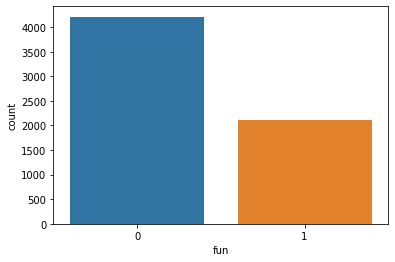

In [17]:
sns.countplot(tot['fun'])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


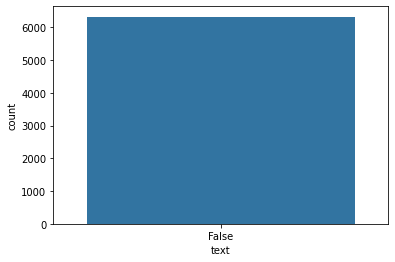

In [18]:
sns.countplot((tot["text"] == None))

##Classificatori

In [17]:
corpus = descrizioni_filtrate

###Tokenizzazione, trasformazione in sequenza e padding

In [18]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

MAX_NB_WORDS = 30000

# get the raw text data

# finally, vectorize the text samples into a 2D integer tensor
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, char_level=False)
tokenizer.fit_on_texts(corpus)

sequences = tokenizer.texts_to_sequences(corpus)
#sequences_test = tokenizer.texts_to_sequences(texts_test)
seq_lens = [len(s) for s in sequences]

In [19]:
def preProcessDescription(description,tokenizer,stopwordsTotali):
  MAX_SEQUENCE_LENGTH = 300

  description.lower()
  words = description.split()

  parole_filtrate = [parola for parola in words if not parola in stopwordsTotali]
 
  descrizione_filtrata = " ".join(parole_filtrate)
  print(descrizione_filtrata)
  # convert the text to a numerical representation
  input_data = tokenizer.texts_to_sequences([descrizione_filtrata])
  input_data = pad_sequences(input_data, maxlen=MAX_SEQUENCE_LENGTH,padding='post')
  original_description = ""
  for i, word in enumerate(input_data[0]):
    if word == 1:
      for key, value in tokenizer.word_index.items():
        if value == i :
          original_description += key + " "
  print('Traduzione della sequenza numero in parole: ')
  print(original_description)
  
  
  return input_data

In [20]:
preProcessDescription('patatine e cocacola',tokenizer,stopwordsTotali)

patatine cocacola
Traduzione della sequenza numero in parole: 



array([[1427,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0, 

In [21]:
sampleIndex = 1998
print('Sequenza parola numero %s: ' % sampleIndex)
for x in sequences[sampleIndex]:
  print('%d,' % x, end =' ')

Sequenza parola numero 1998: 
2050, 438, 12766, 25156, 2050, 1761, 438, 160, 92, 226, 25157, 1761, 1564, 36, 2420, 871, 193, 25157, 1761, 966, 672, 6358, 614, 2811, 3025, 16842, 503, 2050, 18849, 4079, 1630, 6477, 1981, 244, 156, 4244, 24076, 24077, 5560, 1417, 4931, 265, 40, 4, 86, 193, 41, 33, 1, 85, 4, 8739, 135, 230, 74, 99, 9515, 135, 10726, 1003, 1053, 5667, 14289, 18151, 696, 1517, 1364, 19080, 1677, 1623, 25158, 12766, 5499, 2618, 91, 74, 8739, 7, 1060, 5074, 6147, 24078, 

In [22]:
print('Traduzione della sequenza numero %d in parole: ' % sampleIndex)
index_to_word = dict((i, w) for w, i in tokenizer.word_index.items())
" ".join([index_to_word[i] for i in sequences[sampleIndex]])

Traduzione della sequenza numero 1998 in parole: 


"carbonara day malanghino rilancia carbonara roll day mercoledi 7 aprile carbo roll regalo ogni ordine almeno 50 carbo roll pesce bianco avocado all'interno scampi uova quaglia salsa carbonara briciole guanciale croccante ordina app oppure whatsapp 388 481 5046 delivery take away pranzo 12 30 14 50 cena 19 00 23 30 palese san paolo bari citta modugno san girolamo santo spirito giovinazzo bitonto elenco completo quartieri paesi citati scrivici privato arriviamo malanghino l'esperienza giappone casa bari palese via vittorio veneto 67 newopening"

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(seq_lens, bins=500, color = 'purple')
plt.xlabel('#words')
plt.ylabel('#descriptions')
plt.title('Y documenti con X parole')

In [ ]:
media=np.mean(seq_lens)
print("average length: %0.1f" % media)
print("max length: %d" % max(seq_lens))
y = 0
for i in seq_lens:
  if i < media:
    y = y + 1

print("percentuale descrizioni di lunghezza inferiore ad average length: %d%%" % (int(y*100/len(seq_lens))))


####Padding
La lunghezza media dei testi è di circa 112: eseguo il pad con massima lunghezza 115, valutando che la maggior parte delle descrizioni non supera quel numero di parole.

In [23]:
MAX_SEQUENCE_LENGTH = 120

# pad sequences with 0s
padded = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH,padding='post')

print('Shape of data tensor:', padded.shape)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Shape of data tensor: (6327, 120)
Found 60963 unique tokens.


In [24]:
padded[sampleIndex].shape[0]

120

In [ ]:
'''import gensim.downloader as api

# Download the models (1660MB)
word2vec_model300 = api.load('word2vec-google-news-300')'''

In [27]:
'''
x_emb = []
for sentence in padded:
  print('sentence')
  print(sentence)
  sent_emb = [0 for k in range(300)] 
  
  num_tok = 0
  for tok in sentence:
    if tok != 0:
      word=list(word_index.keys())[list(word_index.values()).index(tok)]
      print('word: '+ word)
      try:
          emb = word2vec_model300.wv[word]
          sent_emb = [x + y for x, y in zip(sent_emb, emb)]
          num_tok = num_tok +1
      except:
          pass
  if num_tok != 0:
    final_sent_emb = [x / num_tok for x in sent_emb]         
  x_emb.append(final_sent_emb)
  

x_emb = np.array(x_emb)
with open('/content/drive/MyDrive/Colab Notebooks/embeddings.npy', 'wb') as f:
    np.save(f, x_emb)
'''
with open('/content/drive/MyDrive/Colab Notebooks/embeddings.npy', 'rb') as f:
    x_emb = np.load(f)
print(type(x_emb))
print(len(x_emb))

<class 'numpy.ndarray'>
6327


In [28]:
x_emb.shape

(6327, 300)

In [ ]:
print(x_emb[sampleIndex])

###Test con alcuni classificatori (con supporto di word2vec)

In [30]:
y = tot[['fun', 'food', 'culture', 'isMusic']]

In [ ]:
from sklearn.decomposition import PCA
pca = PCA (170)

reduced = pca.fit_transform(x_emb)

X_reduced,X_testReduced,y_trainReduced,y_testReduced = train_test_split(reduced,y,test_size=0.25,random_state=42)
reduced.shape

In [ ]:
from sklearn.utils import class_weight
weights = class_weight.compute_sample_weight(class_weight="balanced", y=y)

In [ ]:
weights

####Split

In [31]:
X_train,X_test,y_train,y_test = train_test_split(x_emb,y,test_size=0.25,random_state=42)

##TEST

In [32]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report

# Carica i dati in un dataframe di pandas
df = tot
y = tot[['fun', 'food', 'culture', 'isMusic']]
# Inizializza il TfidfVectorizer
vectorizer = TfidfVectorizer()

# Trasforma i documenti in una matrice di pesi TF-IDF
X = vectorizer.fit_transform(corpus)

X_trainLR, X_testLR, y_trainLR, y_testLR = train_test_split(X, y, test_size=0.2, random_state=42)

# Creazione di un modello di regressione logistica per ogni classe
classes = np.unique(y)
clfs = []
clf = OneVsRestClassifier(LogisticRegression(solver='lbfgs'))

# Fit the classifier to the training data
clf.fit(X_trainLR, y_trainLR)

# Fai le predizioni sul test set
y_pred = clf.predict(X_testLR)
print(classification_report(y_testLR, y_pred))

'''for class_ in classes:
    clf = LogisticRegression(random_state=42)
    clf.fit(X_trainLR, (y_trainLR == class_).astype(int))
    clfs.append(clf)

# Predizione per ogni classe
y_pred = []
for clf in clfs:
    y_pred.append(clf.predict_proba(X_testLR)[:, 1])'''

'''# Plottaggio dei risultati
plt.figure(figsize=(12, 6))
fpr, tpr, _ = roc_curve(y_testLR, y_p)
plt.plot(fpr, tpr, label=f"Class {class_}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()'''

'''# Estrai le etichette target
y_fun = df['fun'].values
y_food = df['food'].values
y_culture = df['culture'].values
y_music = df['isMusic'].values

# Addestra un modello di regressione logistica per ogni classe
clf_fun = LogisticRegression(max_iter=10000)
clf_fun.fit(X, y_fun)

clf_food = LogisticRegression(max_iter=10000)
clf_food.fit(X, y_food)

clf_culture = LogisticRegression(max_iter=10000)
clf_culture.fit(X, y_culture)

clf_music = LogisticRegression(max_iter=10000)
clf_music.fit(X, y_music)

# Prevedi le etichette per un nuovo evento
new_event = ['Techno rave musica ballo amici alcohol']
X_new = vectorizer.transform(new_event)

y_pred_fun = clf_fun.predict_proba(X_new)[0][1]
y_pred_food = clf_food.predict_proba(X_new)[0][1]
y_pred_culture = clf_culture.predict_proba(X_new)[0][1]
y_pred_music = clf_music.predict_proba(X_new)[0][1]

# Confronta i risultati per evincere la categoria di appartenenza dell'evento
probs = [y_pred_fun, y_pred_food, y_pred_culture, y_pred_music]
pred_class = ['fun', 'food', 'culture', 'music'][np.argmax(probs)]
print(f"The new event belongs to the {pred_class} class with a probability of {np.max(probs):.2f}")'''

              precision    recall  f1-score   support

           0       0.84      0.57      0.67       430
           1       0.89      0.78      0.83       572
           2       0.73      0.92      0.81       817
           3       0.92      0.70      0.79       484

   micro avg       0.81      0.77      0.79      2303
   macro avg       0.84      0.74      0.78      2303
weighted avg       0.83      0.77      0.79      2303
 samples avg       0.83      0.80      0.78      2303



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'# Estrai le etichette target\ny_fun = df[\'fun\'].values\ny_food = df[\'food\'].values\ny_culture = df[\'culture\'].values\ny_music = df[\'isMusic\'].values\n\n# Addestra un modello di regressione logistica per ogni classe\nclf_fun = LogisticRegression(max_iter=10000)\nclf_fun.fit(X, y_fun)\n\nclf_food = LogisticRegression(max_iter=10000)\nclf_food.fit(X, y_food)\n\nclf_culture = LogisticRegression(max_iter=10000)\nclf_culture.fit(X, y_culture)\n\nclf_music = LogisticRegression(max_iter=10000)\nclf_music.fit(X, y_music)\n\n# Prevedi le etichette per un nuovo evento\nnew_event = [\'Techno rave musica ballo amici alcohol\']\nX_new = vectorizer.transform(new_event)\n\ny_pred_fun = clf_fun.predict_proba(X_new)[0][1]\ny_pred_food = clf_food.predict_proba(X_new)[0][1]\ny_pred_culture = clf_culture.predict_proba(X_new)[0][1]\ny_pred_music = clf_music.predict_proba(X_new)[0][1]\n\n# Confronta i risultati per evincere la categoria di appartenenza dell\'evento\nprobs = [y_pred_fun, y_pred_food,

Accuratezza del modello sui dati di test: 83.94%
Probabilità di appartenenza alla classe fun: 74.98%


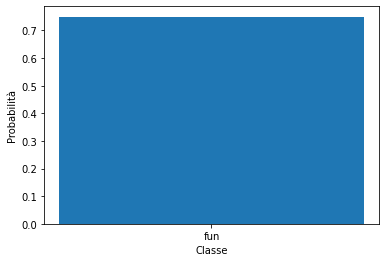

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfIdfText = tfidf.fit_transform(tot['text'])

y1= tot['food'].values
X_traint,X_testt,y_traint,y_testt = train_test_split(tfIdfText,y1,test_size=0.25,random_state=42)

# Inizializza la regressione logistica
clf = LogisticRegression()

# Addestra il modello di regressione logistica
clf.fit(X_traint, y_traint)

# Calcola l'accuratezza del modello sui dati di test
accuracy = clf.score(X_testt, y_testt)
print("Accuratezza del modello sui dati di test: {:.2f}%".format(accuracy * 100))

new_event = np.array(["gelato al cioccolato"])
vettorizzato = tfidf.transform(new_event)

'''sequences1 = tokenizer.texts_to_sequences(desc)
#sequences_test = tokenizer.texts_to_sequences(texts_test)
seq_lens = [len(s) for s in sequences1]
padded1 = pad_sequences(sequences1, maxlen=300,padding='post')
# Fai una previsione per un nuovo esempio
'''
probabilities = clf.predict_proba(vettorizzato)

# Mostra le probabilità di appartenenza ad ogni classe
classes = ["fun"]
for i, class_name in enumerate(classes):
    print("Probabilità di appartenenza alla classe {}: {:.2f}%".format(class_name, probabilities[0][i] * 100))

# Plotta le probabilità di appartenenza ad ogni classe
plt.bar(classes, probabilities[0])
plt.xlabel("Classe")
plt.ylabel("Probabilità")
plt.show()

##Da Multi-label a Multi-classe
A questo punto potremmo pensare di rappresentare il nostro Multi-Label problem come un Multi-Class binary classification problem. È utile costruire questo modello come base di confronto per i prossimi modelli: esso tratterà le label come singoli classification problems. Costruiamo il modello di base.

In [73]:
!pip install scikit-multilearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 KB 4.3 MB/s eta 0:00:00


In [ ]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB,CategoricalNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import GridSearchCV

#Metrics
from sklearn.metrics import accuracy_score, average_precision_score, f1_score, hamming_loss, label_ranking_average_precision_score, precision_recall_curve, recall_score, classification_report, r2_score

#Multilable
from skmultilearn.problem_transform import BinaryRelevance, LabelPowerset
from skmultilearn.ensemble import RakelD, RakelO, LabelSpacePartitioningClassifier
from skmultilearn.adapt import MLkNN

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
y_test

,fun,food,culture,isMusic
1293,1,1,1,0
7141,0,0,1,1
3846,0,0,1,1
4310,0,1,0,0
5319,0,1,0,0
...,...,...,...,...
3448,0,1,1,0
6162,0,0,0,1
1159,1,0,1,1
6140,1,1,1,1


In [ ]:
# Convert Our Multi-Label Prob to Multi-Class
# Binary Classficiation
biRel = BinaryRelevance(KNeighborsClassifier())
biRel2 = BinaryRelevance(SVC())
biRelRed = BinaryRelevance(SVC())

'''
BISOGNA PROVARE COMBINAZIONI FRA CLAS E MOD:
CLAS                | MOD
GaussianNB            BinaryRelevance
BernoulliNB           LabelPowerset
CategoricalNB         RakelD
SVC                   RakelO
KNeighborsClassifier  LabelSpacePartitioningClassifier
SGDClassifier         MLkNN
LogisticRegression
'''

biRel.fit(X_train,y_train)
biRel2.fit(X_train,y_train)
biRelRed.fit(X_reduced, y_trainReduced)

BinaryRelevance(classifier=SVC(), require_dense=[True, True])

In [ ]:
# Predictions
prediction = biRel.predict(X_test).toarray()
prediction2 = biRel2.predict(X_test).toarray()
predictionRed = biRelRed.predict(X_testReduced).toarray()

accuracy: 0.30468
loss di hamming: 0.28097
label ranking average precision: 0.72733


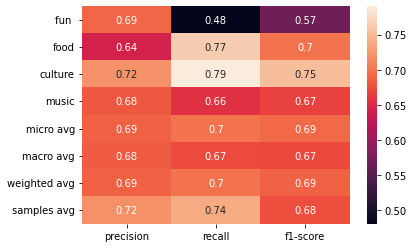

In [ ]:
print('accuracy: %0.5f' % accuracy_score(y_test,prediction))
print('loss di hamming: %0.5f' % hamming_loss(y_test,prediction))
print('label ranking average precision: %0.5f' % label_ranking_average_precision_score(y_test,prediction))
sns.heatmap(pd.DataFrame(classification_report(y_test,prediction, zero_division=1, output_dict=True, target_names=['fun ', 'food', 'culture', 'music'])).iloc[:-1, :].T, annot=True, linecolor='purple')

accuracy: 0.38243
loss di hamming: 0.21429
label ranking average precision: 0.78273


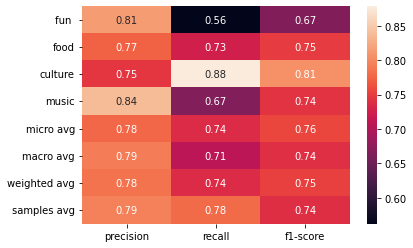

In [ ]:
print('accuracy: %0.5f' % accuracy_score(y_testReduced,predictionRed))
print('loss di hamming: %0.5f' % hamming_loss(y_testReduced,predictionRed))
print('label ranking average precision: %0.5f' % label_ranking_average_precision_score(y_testReduced,predictionRed))
sns.heatmap(pd.DataFrame(classification_report(y_testReduced,predictionRed, zero_division=1, output_dict=True, target_names=['fun ', 'food', 'culture', 'music'])).iloc[:-1, :].T, annot=True, linecolor='purple')

accuracy: 0.37863
loss di hamming: 0.21587
label ranking average precision: 0.77674


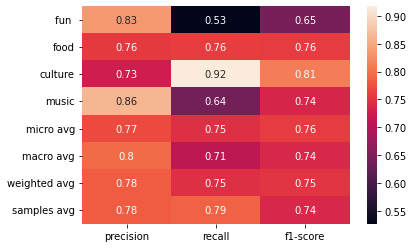

In [ ]:
print('accuracy: %0.5f' % accuracy_score(y_test,prediction2))
print('loss di hamming: %0.5f' % hamming_loss(y_test,prediction2))
print('label ranking average precision: %0.5f' % label_ranking_average_precision_score(y_test,prediction2))
sns.heatmap(pd.DataFrame(classification_report(y_test,prediction2, zero_division=1, output_dict=True, target_names=['fun ', 'food', 'culture', 'music'])).iloc[:-1, :].T, annot=True, linecolor='purple')

##Deep Learning

In [34]:
# mlp for multi-label classification
from numpy import mean
from numpy import std
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot as plt

# get the model
def get_model(n_inputs, n_outputs):
  model = Sequential()
  model.add(Dense(256, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
  model.add(Dense(16, activation='relu'))
  model.add(Dense(n_outputs, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')
  return model

# evaluate a model using repeated k-fold cross-validation
def evaluate_model(X_train, y_train, X_test, y_test):
  results = list()
  # define evaluation procedure
  cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
  model = get_model(X_train.shape[1], y_train.shape[1])
  # fit model
  fit=model.fit(X_train, y_train, verbose=1, epochs=50)
  # make a prediction on the test set
  yhat = model.predict(X_test)
    # calculate accuracy
  acc = accuracy_score(y_test.round(), yhat.round())
  # store result
  print('>%.3f' % acc)
  results.append(acc)
  print(yhat)
  return results,model

 
  '''yhat = yhat.round()
  # calculate accuracy
  acc = accuracy_score(y_test, yhat)
  # store result
  print('>%.3f' % acc)
  results.append(acc)
  return results'''


# evaluate model
results,model = evaluate_model(X_train, y_train, X_test, y_test)


Epoch 1/50
149/149 [==============================] - 2s 5ms/step - loss: 0.6074 - accuracy: 0.2957
Epoch 2/50
149/149 [==============================] - 1s 6ms/step - loss: 0.5289 - accuracy: 0.3937
Epoch 3/50
149/149 [==============================] - 1s 4ms/step - loss: 0.4981 - accuracy: 0.4207
Epoch 4/50
149/149 [==============================] - 1s 3ms/step - loss: 0.4818 - accuracy: 0.4710
Epoch 5/50
149/149 [==============================] - 0s 3ms/step - loss: 0.4685 - accuracy: 0.4940
Epoch 6/50
149/149 [==============================] - 0s 3ms/step - loss: 0.4613 - accuracy: 0.5047
Epoch 7/50
149/149 [==============================] - 0s 3ms/step - loss: 0.4508 - accuracy: 0.5094
Epoch 8/50
149/149 [==============================] - 0s 3ms/step - loss: 0.4458 - accuracy: 0.5151
Epoch 9/50
149/149 [==============================] - 0s 3ms/step - loss: 0.4368 - accuracy: 0.5235
Epoch 10/50
149/149 [==============================] - 0s 3ms/step - loss: 0.4408 - accuracy: 0.5180

In [39]:
# make a prediction
yhat = model.predict(preProcessDescription('patatine e cocacola musica ma sempre con troppe parole roma cultura',tokenizer,stopwordsTotali))

yhat = np.exp(yhat) / np.sum(np.exp(yhat), axis=1, keepdims=True)
print(yhat)


patatine cocacola musica sempre troppe parole roma cultura
Traduzione della sequenza numero in parole: 

1/1 [==============================] - 0s 34ms/step
[[0.13447072 0.13447072 0.36552933 0.36552933]]


###Funzione per costruire il modello

In [ ]:
def build_model(modello,mlb_estimator,xtrain,ytrain,xtest,ytest):
    # Create an Instance
    clf = mlb_estimator(modello)
    clf.fit(xtrain,ytrain)
    # Predict
    clf_predictions = clf.predict(xtest)
    # Check For Accuracy
    acc = accuracy_score(ytest,clf_predictions)
    ham = hamming_loss(ytest,clf_predictions)
    result = {"accuracy:":acc,"hamming_score":ham}
    return result

assegnarli categorie dobbiamo trovare dove la semantica dio un evento che poi puo’derivare da più dati che adesso abbiamo trascurato, in manieraa tale da collocare semantica anche tramite un ontologie esterne il nostro evento in una specie di spazio

questo  ci potrebbe servire per rendere la ricerca di un evento il suo essere consigliato qualcosa di più semantica .


non ci sarà nessun evento in cui ci sarà scritto 'qui si beve alcol' però ci stara degustazione di birra.

potrebbe essere collocare dei termini nello spazio e vedere tramite i dati che noi estraiamo in che posto dello spazio il nostro evento si colloca

Caso d’uso:

mettiamo che tu cerchi :’alcol a bari a quest ora’ .

prendo i 

##Ontologie: WordNet

In [ ]:
!pip install nltk
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.cluster import AffinityPropagation
from nltk import download as dl
from numpy.ma.core import outer
from sys import exit as exit
from nltk import word_tokenize as tkn
from re import sub as sub
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.cluster import KMeans
dl('wordnet')
dl('omw-1.4')
dl('punkt')
dl('stopwords')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stp = open("/content/drive/MyDrive/Colab Notebooks/stopwordsita.txt", "r")
data = stp.read().split("\n")
stp.close()
stopwordsTotali = stopwords.words('italian') + stopwords.words('english') + data
stopwordsTotali = list(set(stopwordsTotali))

In [ ]:
def get_max_depth(synset, depth=0):
    hypernyms = synset.hypernyms()
    if not hypernyms:
        return depth
    return max(get_max_depth(h, depth + 1) for h in hypernyms)
###############################################################
##
##                     NON FUNZIONA
##
###############################################################
def getHypernyms(stringa):
  lemmatizer = WordNetLemmatizer()
  synset=wn.synsets(stringa,lang='ita',pos=wn.NOUN)
  if(synset == []):
    synset=wn.synsets(stringa,lang='ita',pos=wn.VERB)
    if(synset == []):
      synset=wn.synsets(stringa,lang='ita',pos=wn.ADV)
  dpt=get_max_depth(synset[0])
  rangemax=3
  
  lista=[]
  lista.append(synset[0])
  while(dpt != rangemax):
    if(dpt < rangemax):
      lista.append(lista[len(lista)-1].hypernyms()[0])
      dpt=dpt+1
    else:
      
      dpt=dpt-1
  return lista

def get_syns(description):
  test=[]
  desc=sub(r'\d+', '', description)
  lwr=desc.lower()
  words = tkn(lwr)
  for every in words:
    if (every not in stopwordsTotali):
      if(wn.synsets(every, lang ='ita') == []):
        
          test.append(wn.synsets(every))
      else:
        
          test.append(wn.synsets(every, lang ='ita'))

  lemmatizer = WordNetLemmatizer()
  ciao =[]
  for each in range(len(test)):
    for q in range(len(test[each])):
      ciao.append(lemmatizer.lemmatize(test[each][q].name().split('.')[0]))

  ciao=list(set(ciao))
  return ciao

  
'''
def get_wordnet_features(text):
    lemmatizer = WordNetLemmatizer()
    words = nltk.word_tokenize(text)
    features = []
    for word in words:
        synsets = wordnet.synsets(word)
        for synset in synsets:
            features.append(lemmatizer.lemmatize(synset.name().split('.')[0]))
    return features

# Utilizza la funzione get_wordnet_features per estrarre le features dalle descrizioni
'''

"\ndef get_wordnet_features(text):\n    lemmatizer = WordNetLemmatizer()\n    words = nltk.word_tokenize(text)\n    features = []\n    for word in words:\n        synsets = wordnet.synsets(word)\n        for synset in synsets:\n            features.append(lemmatizer.lemmatize(synset.name().split('.')[0]))\n    return features\n\n# Utilizza la funzione get_wordnet_features per estrarre le features dalle descrizioni\n"

In [ ]:
#probabilmente da rimuovere
'''
# Funzione per estrarre l'ontologia da una descrizione
def get_ontology(description):
  # Tokenizza la descrizione
  words = nltk.word_tokenize(description)

  # Crea una lista vuota per le lemmi delle parole
  lemmas = []

  # Itera su ogni parola nella descrizione
  for word in words:
    # Ottieni tutti i lemmi per la parola
    lemma = wn.lemmas(word,lang='ita')

    # Aggiungi il lemma alla lista
    lemmas.append(lemma)

  # Restituisci la lista dei lemmi
  return lemmas

# Esempio di utilizzo della funzione get_ontology
description = "oggi ho proprio voglia di gelato"
ontology = get_ontology(description)
print(ontology)

# Integrazione dell'ontologia con il modello di classificazione
def classify_with_ontology(model, description):
  # Estrarre l'ontologia dalla descrizione
  ontology = get_ontology(description)

  # Passare l'ontologia al modello di classificazione
  prediction = model.predict(ontology)

  # Restituire la predizione del modello
  return prediction
'''

[[Lemma('nowadays.r.01.oggi'), Lemma('today.r.02.oggi'), Lemma('today.n.02.oggi'), Lemma('today.n.01.oggi')], [], [Lemma('merely.r.01.proprio'), Lemma('quite.r.02.proprio'), Lemma('very.r.01.proprio'), Lemma('just.r.03.proprio'), Lemma('truly.r.01.proprio'), Lemma('in_truth.r.01.proprio'), Lemma('right.r.03.proprio'), Lemma('actually.r.01.proprio'), Lemma('precisely.r.01.proprio'), Lemma('right.r.01.proprio'), Lemma('very.r.02.proprio'), Lemma('own.s.01.proprio'), Lemma('very.s.01.proprio'), Lemma('identical.s.02.proprio')], [Lemma('birthmark.n.01.voglia'), Lemma('lecherousness.n.01.voglia')], [], [Lemma('cocaine.n.01.cocaina')]]


In [ ]:
X1 = []
newText=tot['text'].tolist()
for description in newText:
    feature =[]
    #print(description)
    features = get_syns(str(description))
    #print(features)
    words = ''
    for each in features:
      words = words + ' ' + each
    X1.append(words) 

In [ ]:
tot['text'][0]

'Martedi 05 gennaio super tombolata al Barfly!\nTante calze da vincere!!!\nFormula 10 euro panino patatine e bibita e la cartella la offriamo noi!\nConsigliata la prenotazione\n081660023'

In [ ]:
X1[0]

' bun satchel recipe rule chip security acquire file ace get_the_better_of overcome beat booking formula french_fries briefcase portfolio soft_drink super surpass prevail bail superintendent extremely win folder'

In [ ]:
vectorizer = CountVectorizer()
vectorizerTfIdf=TfidfVectorizer()

vector = vectorizer.fit_transform(X1)
vectorTfIdf=vectorizerTfIdf.fit_transform(X1)

In [ ]:
X_train1, X_test1 = train_test_split(vectorTfIdf, test_size=0.2, random_state=42) 

In [ ]:
number_of_clusters=10
km = KMeans(n_clusters=number_of_clusters)
# Normally people fit the matrix
km.fit(X_train1)
# But you could fit the idf_df instea
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = vectorizerTfIdf.get_feature_names()
for i in range(number_of_clusters):
    top_ten_words = [terms[ind] for ind in order_centroids[i, :5]]
    print("Cluster {}: {}".format(i, ' '.join(top_ten_words)))

Top terms per cluster:
Cluster 0: nan grandma zurich essence esprit_de_corps
Cluster 1: manual ore corsican wale avenue
Cluster 2: only lonely lone alone single
Cluster 3: complimentary dislodge exempt absolve rid
Cluster 4: first earlier once ahead sooner
Cluster 5: together simultaneously jointly whole ensemble
Cluster 6: menu music sheet_music band dinner
Cluster 7: momentous adult distinguished important_person large
Cluster 8: embody belong_to equal being occur
Cluster 9: ore information band music live


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
apModel = AffinityPropagation()
# Addestra il modello sulla nuova rappresentazione delle descrizioni
res11=apModel.fit(X_train1)


In [ ]:
from sklearn import metrics
cluster_centers_indices = res11.cluster_centers_indices_
labels = res11.labels_
n_clusters_ = len(cluster_centers_indices)

In [ ]:
print("Estimated number of clusters: %d" % n_clusters_)

Estimated number of clusters: 0


In [ ]:

print("Homogeneity: %0.3f" % metrics.homogeneity_score(X_test1.toarray(), labels))
print("Completeness: %0.3f" % metrics.completeness_score(X_test1, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(X_test1, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(X_test1, labels))
print(
    "Adjusted Mutual Information: %0.3f"
    % metrics.adjusted_mutual_info_score(X_test1, labels)
)
print(
    "Silhouette Coefficient: %0.3f"
    % metrics.silhouette_score(X, labels, metric="sqeuclidean")
)

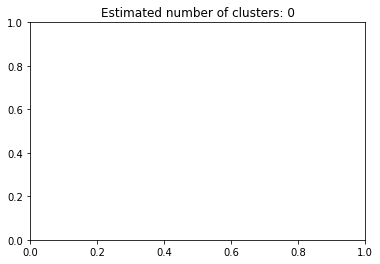

In [ ]:
plt.figure(1)
plt.clf()

colors = plt.cycler("color", plt.cm.viridis(np.linspace(0, 1, 4)))

for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_train1[cluster_centers_indices[k]]
    plt.scatter(
        X_train1[class_members, 0], X_train1[class_members, 1], color=col["color"], marker="."
    )
    plt.scatter(
        cluster_center[0], cluster_center[1], s=14, color=col["color"], marker="o"
    )
    for x in X_train1[class_members]:
        plt.plot(
            [cluster_center[0], x[0]], [cluster_center[1], x[1]], color=col["color"]
        )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

In [ ]:
predictionRes11 = res11.predict(X_test1)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_affinity_propagation.py:528: ConvergenceWarning: This model does not have any cluster centers because affinity propagation did not converge. Labeling every sample as '-1'.
  warnings.warn(


In [ ]:
plt.close("all")
plt.figure(1)
plt.clf()

colors = plt.cycler("color", plt.cm.viridis(np.linspace(0, 1, 4)))

for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.scatter(
        X[class_members, 0], X[class_members, 1], color=col["color"], marker="."
    )
    plt.scatter(
        cluster_center[0], cluster_center[1], s=14, color=col["color"], marker="o"
    )
    for x in X[class_members]:
        plt.plot(
            [cluster_center[0], x[0]], [cluster_center[1], x[1]], color=col["color"]
        )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

In [ ]:
from wordcloud import WordCloud

In [ ]:
with open('drive/MyDrive/Colab Notebooks/stopwordsita.txt') as file:
  content=file.read()
lines=content.split('\n')
swSet=set(lines)


In [ ]:
labels=apModel.labels_
cluster_labels = np.unique(labels)
cluster_sizes = [(labels == c).sum() for c in cluster_labels]
sizes_idx = np.argsort(cluster_sizes)[::-1][:5]

# Plot dei risultati
for i, c in enumerate(cluster_labels[sizes_idx]):
    mask = (labels == c)
    descrizioni_c = np.array(tot['text'])[mask]
    text = " ".join(descrizioni_c)
    
    wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = swSet, 
                min_font_size = 10).generate(text)

    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0)

# Stampa dei 5 termini più comuni dei 5 cluster più grandi
for i, c in enumerate(cluster_labels[sizes_idx]):
    mask = (labels == c)
    descrizioni_c = np.array(tot['text'])[mask]
    text = " ".join(descrizioni_c)
    words = nltk.word_tokenize(text)
    fdist = nltk.FreqDist(words)

In [ ]:
def search_events(query, model, lemmatizer):
    features = get_wordnet_features(query)
    query_vectors = []
    for feature in features:
        feature = lemmatizer.lemmatize(feature)
        if feature in model.vocabulary_:
            query_vectors.append(model.transform([feature]).toarray()[0])
    query_vector = np.mean(query_vectors, axis=0)
    events = model.predict(query_vector.reshape(1, -1))
    return events

lemmatizer = WordNetLemmatizer()
events = search_events("alcool", biRel2, lemmatizer)